In [137]:
import pandas as pd
from sklearn import set_config
set_config(transform_output='pandas')

# Full path to your CSV
file_path = '/Users/asliozdemirstrollo/Documents/Documents/Time Series/Clean Skies London/air-quality-london-monthly-averages.csv'

# Create a Pandas DataFrame from the CSV data
df = pd.read_csv(file_path)

# Show first rows
print(df.head())

    Month  London Mean Roadside:Nitric Oxide (ug/m3)  \
0  Jan-08                                        NaN   
1  Feb-08                                        NaN   
2  Mar-08                                        NaN   
3  Apr-08                                        NaN   
4  May-08                                        NaN   

   London Mean Roadside:Nitrogen Dioxide (ug/m3)  \
0                                           55.5   
1                                           75.9   
2                                           55.6   
3                                           61.8   
4                                           62.9   

   London Mean Roadside:Oxides of Nitrogen (ug/m3)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   London Mean Roadside:O

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Month                                              139 non-null    object 
 1   London Mean Roadside:Nitric Oxide (ug/m3)          115 non-null    float64
 2   London Mean Roadside:Nitrogen Dioxide (ug/m3)      139 non-null    float64
 3   London Mean Roadside:Oxides of Nitrogen (ug/m3)    115 non-null    float64
 4   London Mean Roadside:Ozone (ug/m3)                 139 non-null    float64
 5   London Mean Roadside:PM10 Particulate (ug/m3)      139 non-null    float64
 6   London Mean Roadside:PM2.5 Particulate (ug/m3)     139 non-null    float64
 7   London Mean Roadside:Sulphur Dioxide (ug/m3)       139 non-null    float64
 8   London Mean Background:Nitric Oxide (ug/m3)        115 non-null    float64
 9   London Mea

In [139]:
df['Month']

0      Jan-08
1      Feb-08
2      Mar-08
3      Apr-08
4      May-08
        ...  
134    Mar-19
135    Apr-19
136    May-19
137    Jun-19
138    Aug-19
Name: Month, Length: 139, dtype: object

In [140]:
# Converting the Month column to a datetime format

df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)
df = df.sort_index()

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2008-01-01 to 2019-08-01
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   London Mean Roadside:Nitric Oxide (ug/m3)          115 non-null    float64
 1   London Mean Roadside:Nitrogen Dioxide (ug/m3)      139 non-null    float64
 2   London Mean Roadside:Oxides of Nitrogen (ug/m3)    115 non-null    float64
 3   London Mean Roadside:Ozone (ug/m3)                 139 non-null    float64
 4   London Mean Roadside:PM10 Particulate (ug/m3)      139 non-null    float64
 5   London Mean Roadside:PM2.5 Particulate (ug/m3)     139 non-null    float64
 6   London Mean Roadside:Sulphur Dioxide (ug/m3)       139 non-null    float64
 7   London Mean Background:Nitric Oxide (ug/m3)        115 non-null    float64
 8   London Mean Background:Nitrogen Dioxide (ug/m3)    139 non-null    floa

In [141]:
for col in df.columns:
    print(f"'{col}'")

'London Mean Roadside:Nitric Oxide (ug/m3)'
'London Mean Roadside:Nitrogen Dioxide (ug/m3)'
'London Mean Roadside:Oxides of Nitrogen (ug/m3)'
'London Mean Roadside:Ozone (ug/m3)'
'London Mean Roadside:PM10 Particulate (ug/m3)'
'London Mean Roadside:PM2.5 Particulate (ug/m3)'
'London Mean Roadside:Sulphur Dioxide (ug/m3)'
'London Mean Background:Nitric Oxide (ug/m3)'
'London Mean Background:Nitrogen Dioxide (ug/m3)'
'London Mean Background:Oxides of Nitrogen (ug/m3)'
'London Mean Background:Ozone (ug/m3)'
'London Mean Background:PM10 Particulate (ug/m3)'
'London Mean Background:PM2.5 Particulate (ug/m3)'
'London Mean Background:Sulphur Dioxide (ug/m3)'


In [142]:
# keep this column
df = df[['London Mean Roadside:Nitrogen Dioxide (ug/m3)']].rename(
    columns={'London Mean Roadside:Nitrogen Dioxide (ug/m3)': 'NO2_ug_m3'}
)

In [143]:
# 2-Plot the time series to visualise any apparent trends or seasonality.

In [144]:
df

,NO2_ug_m3
Month,
2008-01-01,55.5
2008-02-01,75.9
2008-03-01,55.6
2008-04-01,61.8
2008-05-01,62.9
...,...
2019-03-01,42.6
2019-04-01,46.2
2019-05-01,39.7


In [145]:
print(df.describe())

        NO2_ug_m3
count  139.000000
mean    55.210072
std      8.264656
min     34.900000
25%     48.700000
50%     55.500000
75%     60.300000
max     75.900000


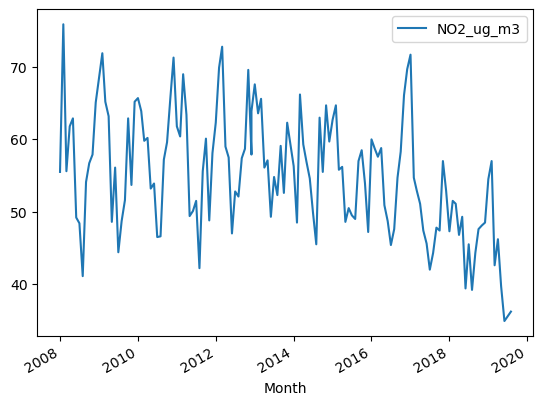

In [146]:
df.plot();

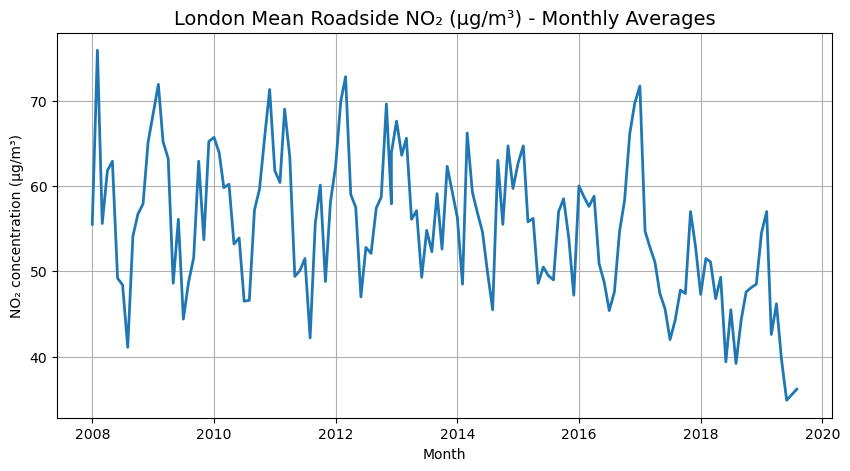

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['NO2_ug_m3'], color='tab:blue', linewidth=2)
plt.title('London Mean Roadside NO₂ (µg/m³) - Monthly Averages', fontsize=14)
plt.xlabel('Month')
plt.ylabel('NO₂ concentration (µg/m³)')
plt.grid(True)
plt.show()

In [148]:
# 3 Check Stationarity with the Augmented Dickey-Fuller (ADF) Test

# Conduct the ADF test on the Nitrogen Dioxide (ug/m3) column. Write a few notes about the test results: 
# Is the series stationary? What can you infer from the ADF statistic and the p-value?

In [149]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from typing import Any

In [150]:
# Perform the ADF test on the 'Adj Close' column
result: Any = adfuller(df["NO2_ug_m3"])

# Print the ADF statistic and the p-value
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])

# Print the critical values for different confidence levels
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

ADF Statistic: 0.017365
p-value: 0.959945
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


In [151]:
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary and requires differencing.")

The time series is non-stationary and requires differencing.


In [152]:
# Visualise Autocorrelation with an ACF Plot

# Create an ACF plot for the Nitrogen Dioxide (ug/m3) values. Are there any notable spikes beyond the confidence intervals? 
# What do these tell you about the structure of the data? Note down your observations.

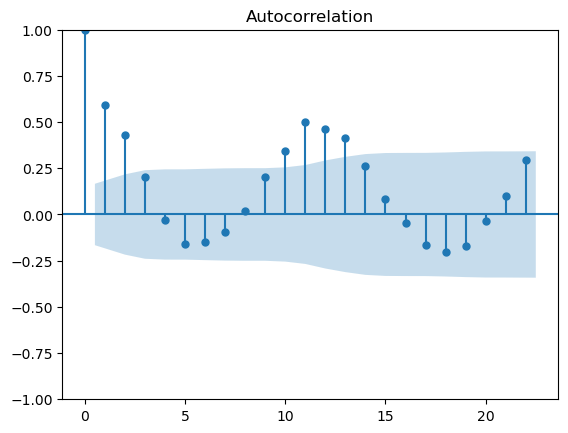

In [153]:
plot_acf(df['NO2_ug_m3']);

In [154]:
# 5 Make the Series Stationary

# If your ADF test indicated non-stationarity, try differencing the series. 
# Apply first-order differencing to the Nitrogen Dioxide (ug/m3) column and plot the differenced values.
# erform the ADF test again to verify if the series is now stationary.

In [155]:
df.dtypes

NO2_ug_m3    float64
dtype: object

<Axes: xlabel='Month'>

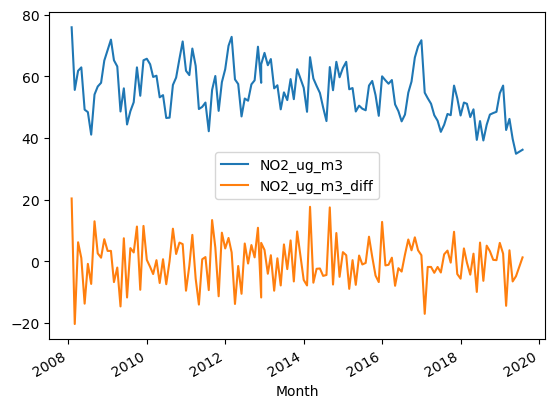

In [156]:
df = df.copy()
df['NO2_ug_m3_diff'] = df['NO2_ug_m3'].diff()
df = df.dropna()
df.plot()

In [157]:
print(df.index.inferred_freq)

None


In [158]:
print(df.head(15))

            NO2_ug_m3  NO2_ug_m3_diff
Month                                
2008-02-01       75.9            20.4
2008-03-01       55.6           -20.3
2008-04-01       61.8             6.2
2008-05-01       62.9             1.1
2008-06-01       49.2           -13.7
2008-07-01       48.4            -0.8
2008-08-01       41.1            -7.3
2008-09-01       54.1            13.0
2008-10-01       56.7             2.6
2008-11-01       57.9             1.2
2008-12-01       65.1             7.2
2009-01-01       68.5             3.4
2009-02-01       71.9             3.4
2009-03-01       65.2            -6.7
2009-04-01       63.2            -2.0


In [159]:
# perform the ADF test on the differenced data.

In [160]:
# Perform the ADF test on the differenced data
result = adfuller(df['NO2_ug_m3_diff'])

# Print the ADF statistic and the p-value after differencing
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])

# Print the critical values after differencing
print('Critical Values after differencing:')
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

ADF Statistic after differencing: -9.347371
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.483
	5%: -2.884
	10%: -2.579


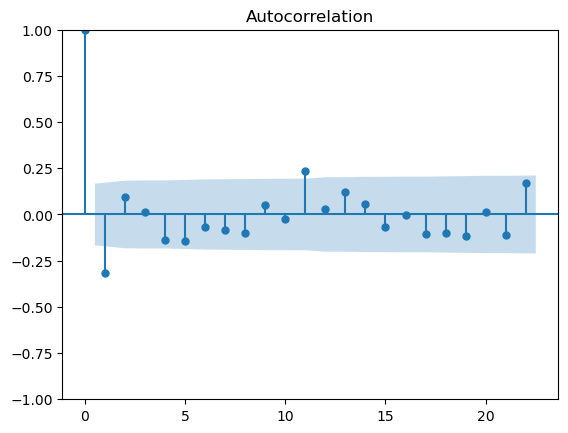

In [161]:
plot_acf(df['NO2_ug_m3_diff']);